In [1]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

import pickle 
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
sns.set_style("darkgrid")
from copy import deepcopy

from sklearn import metrics

%pylab inline

%matplotlib inline

%time

/Users/sdutta/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


## Added Feature Set --- balanced

In [2]:
with open('../Data/BalncedDf.pkl', 'rb') as picklefile: 
    TripAnalysis = pickle.load(picklefile)

In [3]:
TripAnalysis.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,...,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
2,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
4,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,999,48082,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,999,165900,Wednesday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
TripAnalysis['TripType'].unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,  24,  33,  43,  31,
        27,  34,  18,  44,  22])

In [5]:
TripAnalysis['TripType'].nunique()

31

In [6]:
TripAnalysis['TripType'].value_counts()

31     1800
40     1800
33     1800
34     1800
3      1800
35     1800
36     1800
5      1800
37     1800
6      1800
38     1800
7      1800
39     1800
999    1800
8      1800
9      1800
30     1800
41     1800
42     1800
43     1800
44     1800
15     1800
18     1800
20     1800
21     1800
22     1800
24     1800
25     1800
26     1800
27     1800
32     1800
Name: TripType, dtype: int64

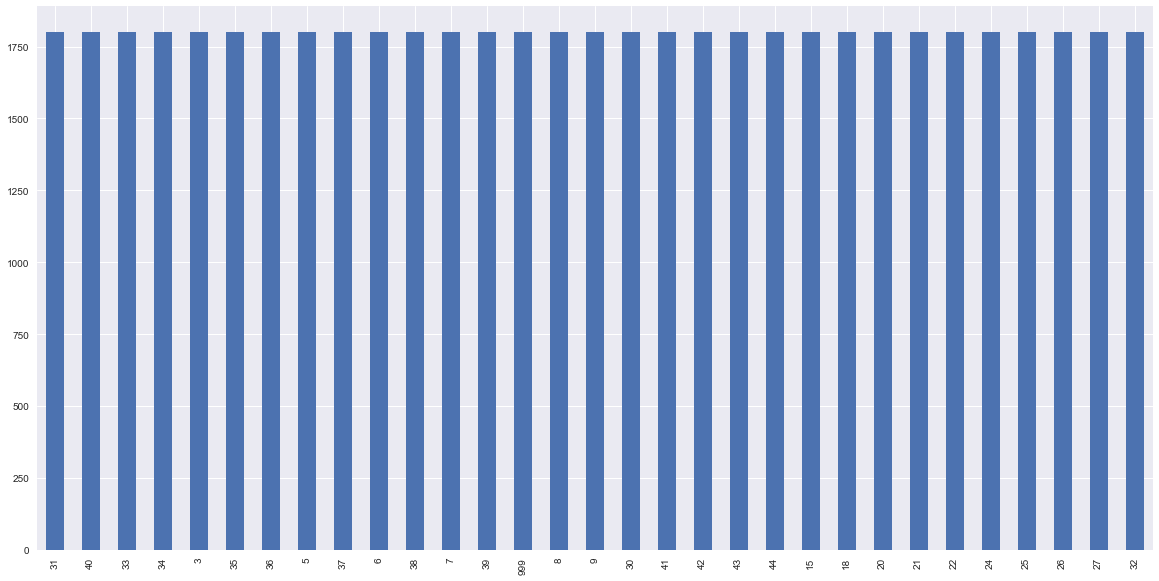

In [7]:
TripAnalysis['TripType'].value_counts().plot(kind='bar',figsize=(20,10) )

In [8]:
TripAnalysis.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,...,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
2,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
4,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,999,48082,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,999,165900,Wednesday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Split , Test:Train = 70:30

In [9]:
from sklearn.cross_validation import train_test_split

/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X = TripAnalysis.loc[:,'Saturday':]
y = TripAnalysis.loc[:,'TripType']

In [11]:
X.head()

,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,...,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
y.nunique()

31

In [12]:
y.head()

2    999
3    999
4    999
5    999
6    999
Name: TripType, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify =y)

In [14]:
len(y_train)/len(y_test)

2.3333333333333335

In [15]:
y_test.value_counts()

31     540
7      540
33     540
18     540
34     540
3      540
35     540
20     540
36     540
5      540
21     540
37     540
6      540
22     540
38     540
39     540
15     540
999    540
8      540
24     540
40     540
9      540
25     540
41     540
26     540
42     540
27     540
43     540
44     540
30     540
32     540
Name: TripType, dtype: int64

In [16]:
y_train.value_counts()

31     1260
40     1260
33     1260
34     1260
3      1260
35     1260
36     1260
5      1260
37     1260
6      1260
38     1260
7      1260
39     1260
999    1260
8      1260
9      1260
30     1260
41     1260
42     1260
43     1260
44     1260
15     1260
18     1260
20     1260
21     1260
22     1260
24     1260
25     1260
26     1260
27     1260
32     1260
Name: TripType, dtype: int64

In [18]:
1260/540   #Check ratio for class 8

2.3333333333333335

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

#### multi_class :  default: ‘ovr’

In [21]:
%%time
logreg = LogisticRegression()       #class_weight='balanced' already
logreg.fit(X_train, y_train)

y_log_pred_train = logreg.predict(X_train)
print('Logistic Regression Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_log_pred_train))

Logistic Regression Accuracy Score (Train)= 0.676241679467
CPU times: user 39.7 s, sys: 231 ms, total: 40 s
Wall time: 41 s


In [22]:
%%time
y_Log_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_Log_pred))

Logistic Regression Accuracy Score(Test)= 0.66523297491
CPU times: user 35.3 ms, sys: 25.1 ms, total: 60.4 ms
Wall time: 55.2 ms


#### For multi_class  use ‘multinomial’  ---->  solver = 'newton-cg'

Note: Need to add solver =  ‘newton-cg’, ‘sag’ or ‘lbfgs’  
As the default solver ‘liblinear’ doesn't support multinomial

In [25]:
%time
logreg = LogisticRegression(multi_class= 'multinomial', solver = 'newton-cg')
logreg.fit(X_train, y_train)
y_log_pred_train = logreg.predict(X_train)
print('Logistic Regression Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_log_pred_train))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
Logistic Regression Accuracy Score (Train)= 0.682642089094


In [24]:
%%time
y_Log_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_Log_pred))

Logistic Regression Accuracy Score(Test)= 0.669534050179
CPU times: user 29.1 ms, sys: 9.76 ms, total: 38.8 ms
Wall time: 29.8 ms


In [26]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_log_pred_train, average='micro')
print('Recall micro-average for Logistic Regression (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test, y_Log_pred, average='micro')
print('Recall micro-average for Logistic Regression (Test) =', RecallTest)

Recall micro-average for Logistic Regression (Train) = 0.682642089094
Recall micro-average for Logistic Regression (Test) = 0.669534050179


In [28]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_log_pred_train, average='micro')
print('Precision micro-average for Logistic Regression (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_Log_pred, average='micro')
print('Precision micro-average for Logistic Regression (Test) =', PrecisionTest)

Precision micro-average for Logistic Regression (Train) = 0.682642089094
Precision micro-average for Logistic Regression (Test) = 0.669534050179


In [29]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_log_pred_train, average='micro')
print('F1_score micro-average for Logistic Regression (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_Log_pred, average='micro')
print('F1_score micro-average for Logistic Regression (Test) =', F1Test)

F1_score micro-average for Logistic Regression (Train) = 0.682642089094
F1_score micro-average for Logistic Regression (Test) = 0.669534050179


In [31]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_test, y_Log_pred))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy: 0.670
             precision    recall  f1-score   support

          3       0.86      0.94      0.90       540
          5       0.78      0.88      0.83       540
          6       0.82      0.85      0.83       540
          7       0.66      0.66      0.66       540
          8       0.55      0.79      0.65       540
          9       0.47      0.55      0.51       540
         15       0.60      0.50      0.55       540
         18       0.71      0.71      0.71       540
         20       0.80      0.82      0.81       540
         21       0.70      0.76      0.73       540
         22       0.76      0.84      0.80       540
         24       0.61      0.60      0.60       540
         25       0.63      0.71      0.67       540
         26       0.72      0.74      0.73       540
         27       0.82      0.77      0.80       540
         30       0.61      0.68      0.64       540
         31       0.91      0.94      0.92       540
         32       0.75      0

#### Confusion Matrix - Logistic Regression - Multinomial

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn
seaborn.set_style("white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
def plot_confusion(title_plot,y_test, y_pred):
    
    #y_pred = clf.predict(x)
    c_mat = confusion_matrix(y_test,y_pred)
    labels = unique(y_test)
    seaborn.heatmap(
        sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=False);
    ylabel("True Label", fontsize = 'large',fontweight ='bold' )
    xlabel("Predicted Label", fontsize = 'large',fontweight ='bold' )
    title(title_plot, fontsize = 'xx-large',fontweight ='bold' )

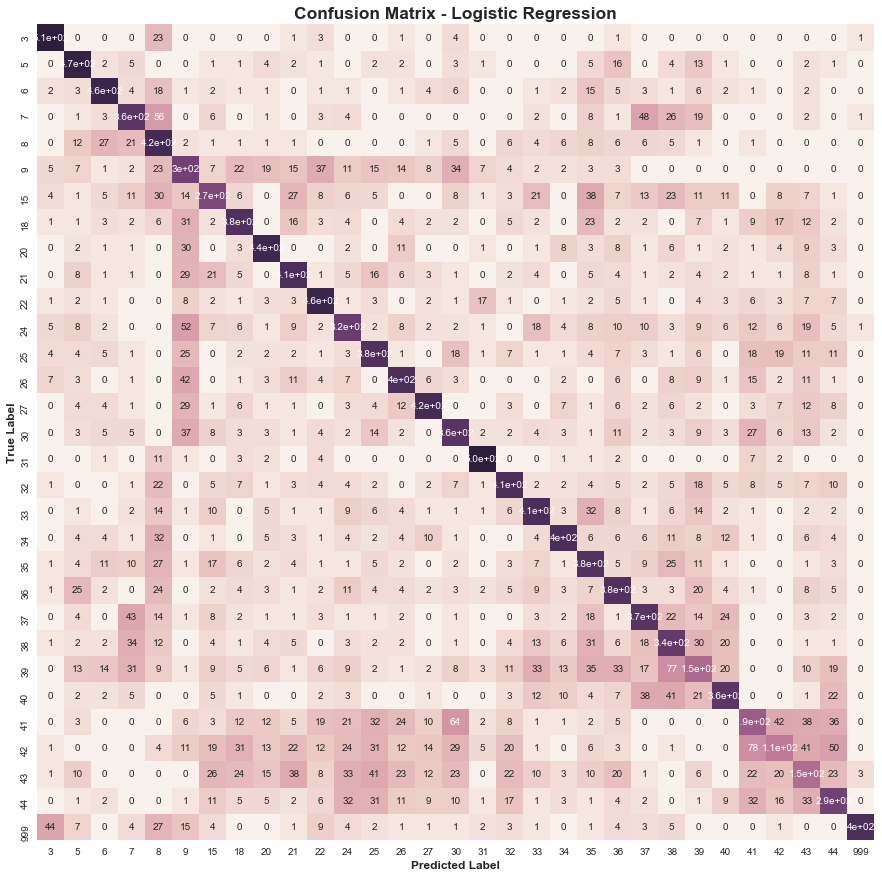

In [34]:
figsize(15, 15)
plot_confusion('Confusion Matrix - Logistic Regression',y_test, y_Log_pred)

#### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
k_range = list(range(1, 21))
k_scores = []

In [37]:
%%time
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_knn_pred = knn.predict(X_test)
    print('k=',k,'  Accuracy Score=',metrics.accuracy_score(y_test, y_knn_pred))
    k_scores.append(metrics.accuracy_score(y_test, y_knn_pred))  
    ## Here y_test is actual scores from the test set and y_pred are scores predicted by model for the test set data

k= 1   Accuracy Score= 0.712544802867
k= 2   Accuracy Score= 0.672520908005
k= 3   Accuracy Score= 0.679510155317
k= 4   Accuracy Score= 0.666367980884
k= 5   Accuracy Score= 0.661350059737
k= 6   Accuracy Score= 0.655077658303
k= 7   Accuracy Score= 0.6513739546
k= 8   Accuracy Score= 0.644086021505
k= 9   Accuracy Score= 0.644205495818
k= 10   Accuracy Score= 0.641875746714
k= 11   Accuracy Score= 0.641517323775
k= 12   Accuracy Score= 0.637753882915
k= 13   Accuracy Score= 0.634826762246
k= 14   Accuracy Score= 0.633034647551
k= 15   Accuracy Score= 0.633094384707
k= 16   Accuracy Score= 0.635364396655
k= 17   Accuracy Score= 0.632915173238
k= 18   Accuracy Score= 0.632855436081
k= 19   Accuracy Score= 0.633034647551
k= 20   Accuracy Score= 0.630704898447
CPU times: user 15min 50s, sys: 8.1 s, total: 15min 58s
Wall time: 16min 8s


In [40]:
max(k_scores)   # Best Accuracy at k=1

0.71254480286738353

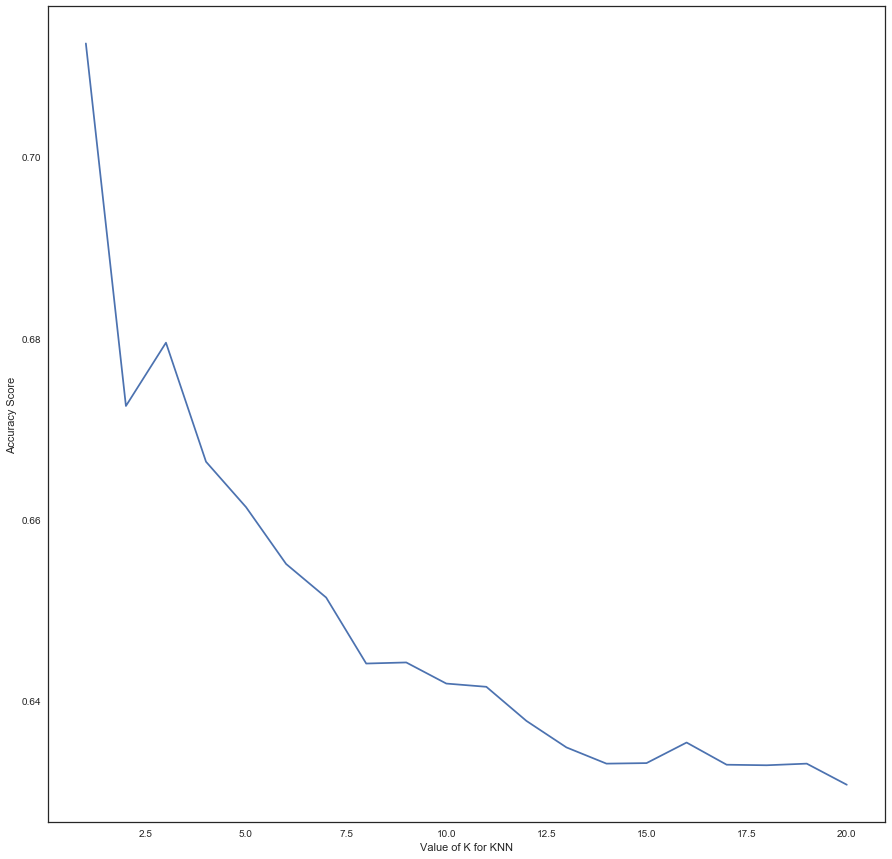

In [41]:
# plot the value of K for KNN (x-axis) versus the accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')

#### KNN for best accuracy score at k=  3   -------->>>>> BEST AT 67.99%

k=1 overfit

In [43]:
%%time
knn = KNeighborsClassifier(n_neighbors=3) #,class_weight='balanced')
knn.fit(X_train, y_train)

y_knn_pred_train = knn.predict(X_train)
print('KNN (k=',k,') Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_knn_pred_train))   

KNN (k= 20 ) Accuracy Score (Train)= 0.807296466974
CPU times: user 1min 32s, sys: 532 ms, total: 1min 32s
Wall time: 1min 33s


In [44]:
%%time
y_knn_pred = knn.predict(X_test)
print('KNN (k=',k,') Accuracy Score(Test) =',metrics.accuracy_score(y_test, y_knn_pred))

KNN (k= 20 ) Accuracy Score(Test) = 0.679510155317
CPU times: user 39.9 s, sys: 340 ms, total: 40.2 s
Wall time: 40.6 s


In [45]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_knn_pred_train, average='micro')
print('Recall micro-average for KNN (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_knn_pred, average='micro')
print('Recall micro-average for KNN (Test) =', RecallTest)

Recall micro-average for KNN (Train) = 0.807296466974
Recall micro-average for KNN (Test) = 0.679510155317


In [46]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_knn_pred_train, average='micro')
print('Precision micro-average for KNN (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_knn_pred, average='micro')
print('Precision micro-average for KNN (Test) =', PrecisionTest)

Precision micro-average for KNN (Train) = 0.807296466974
Precision micro-average for KNN (Test) = 0.679510155317


In [47]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_knn_pred_train, average='micro')
print('F1_score micro-average for KNN (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_knn_pred, average='micro')
print('F1_score micro-average for KNN (Test) =', F1Test)

F1_score micro-average for KNN (Train) = 0.807296466974
F1_score micro-average for KNN (Test) = 0.679510155317


In [48]:
%%time
y_knn_pred = knn.predict(X_test)
print('KNN (k=',k,') Accuracy Score(Test) =',metrics.accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

KNN (k= 20 ) Accuracy Score(Test) = 0.679510155317
             precision    recall  f1-score   support

          3       0.79      0.91      0.85       540
          5       0.73      0.84      0.78       540
          6       0.74      0.89      0.81       540
          7       0.50      0.61      0.55       540
          8       0.59      0.63      0.61       540
          9       0.56      0.39      0.46       540
         15       0.59      0.75      0.66       540
         18       0.71      0.88      0.79       540
         20       0.79      0.92      0.85       540
         21       0.77      0.88      0.82       540
         22       0.75      0.78      0.76       540
         24       0.50      0.46      0.48       540
         25       0.62      0.57      0.59       540
         26       0.77      0.90      0.83       540
         27       0.82      0.88      0.85       540
         30       0.65      0.71      0.68       540
         31       0.89      0.94      0.91     

#### Confusion Matrix KNN, k=17

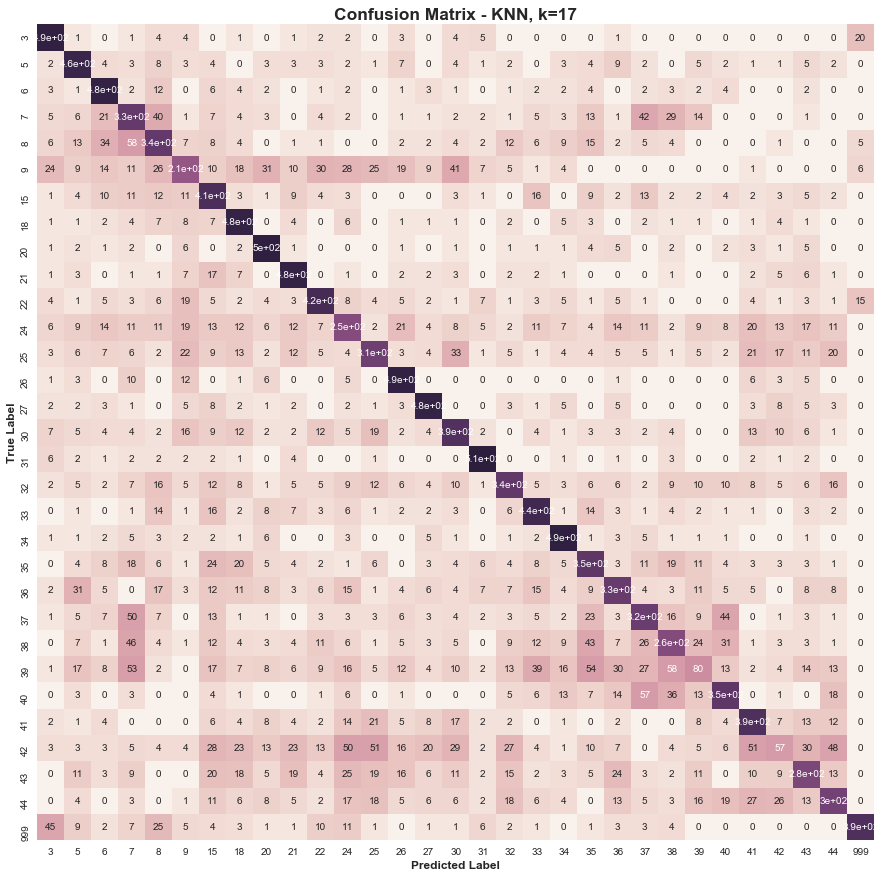

In [49]:
figsize(15, 15)
plot_confusion('Confusion Matrix - KNN, k=17',y_test, y_knn_pred)

#### Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB 

In [51]:
%%time
GNB = GaussianNB()  #class_weight='balanced'
GNB.fit(X_train, y_train)

y_GNB_pred_train = GNB.predict(X_train)
print('Gaussian Naive Bayes Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_GNB_pred_train))

Gaussian Naive Bayes Accuracy Score (Train)= 0.385381464414
CPU times: user 989 ms, sys: 517 ms, total: 1.51 s
Wall time: 1.59 s


In [52]:
%%time
y_GNB_pred = GNB.predict(X_test)
print('Gaussian Naive Bayes Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_GNB_pred))

Gaussian Naive Bayes Accuracy Score (Test)= 0.377718040621
CPU times: user 364 ms, sys: 202 ms, total: 565 ms
Wall time: 573 ms


#### Support Vector Machine

In [53]:
from sklearn import svm

#### Linear Kernel 

In [54]:
%%time
model_svm = svm.SVC(kernel='linear',class_weight='balanced')
model_svm.fit(X_train, y_train);

y_SVM_pred_train = model_svm.predict(X_train)
print('SVM Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_pred_train))

SVM Accuracy Score (Train)= 0.734306195597
CPU times: user 4min 6s, sys: 1.86 s, total: 4min 8s
Wall time: 4min 13s


In [55]:
%%time
y_SVM_pred = model_svm.predict(X_test)
print('SVM Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_pred))

SVM Accuracy Score (Test)= 0.703225806452
CPU times: user 47.8 s, sys: 369 ms, total: 48.1 s
Wall time: 48.7 s


In [56]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_SVM_pred_train, average='micro')
print('Recall micro-average for SVM Linear (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_SVM_pred, average='micro')
print('Recall micro-average for SVM Linear (Test) =', RecallTest)

Recall micro-average for SVM Linear (Train) = 0.734306195597
Recall micro-average for SVM Linear (Test) = 0.703225806452


In [57]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_SVM_pred_train, average='micro')
print('Precision micro-average for SVM Linear (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_SVM_pred, average='micro')
print('Precision micro-average for SVM Linear (Test) =', PrecisionTest)

Precision micro-average for SVM Linear (Train) = 0.734306195597
Precision micro-average for SVM Linear (Test) = 0.703225806452


In [58]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_SVM_pred_train, average='micro')
print('F1_score micro-average for SVM Linear (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_SVM_pred, average='micro')
print('F1_score micro-average for SVM Linear (Test) =', F1Test)

F1_score micro-average for SVM Linear (Train) = 0.734306195597
F1_score micro-average for SVM Linear (Test) = 0.703225806452


#### Polynomial Kernel    --- worst results within SVM

In [113]:
%%time
model_svm_pol = svm.SVC(kernel='poly')  #,class_weight='balanced' altrady
model_svm_pol.fit(X_train, y_train);

y_SVM_pol_pred_train = model_svm_pol.predict(X_train)
print('SVM (Polynomial) Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_pol_pred_train))

SVM (Polynomial) Accuracy Score (Train)= 0.652201740911
CPU times: user 6min 27s, sys: 3.06 s, total: 6min 31s
Wall time: 6min 39s


In [114]:
%%time
y_SVM_pol_pred = model_svm_pol.predict(X_test)
print('SVM (Polynomial) Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_pol_pred))

SVM (Polynomial) Accuracy Score (Test)= 0.576403823178
CPU times: user 1min 6s, sys: 414 ms, total: 1min 7s
Wall time: 1min 8s


#### RBF Kernel   ----3rd Best Result

#### decision_function_shape :  default=’ovr’

In [115]:
%%time
model_svm_rbf = svm.SVC(kernel='rbf')      #,class_weight='balanced' already
model_svm_rbf.fit(X_train, y_train);

y_SVM_rbf_pred_train = model_svm_rbf.predict(X_train)
print('SVM (RBF) Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_rbf_pred_train))

SVM (RBF) Accuracy Score (Train)= 0.743164362519
CPU times: user 4min 53s, sys: 2.01 s, total: 4min 55s
Wall time: 4min 57s


In [116]:
%%time
y_SVM_rbf_pred = model_svm_rbf.predict(X_test)
print('SVM (RBF) Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_rbf_pred))

SVM (RBF) Accuracy Score (Test)= 0.695818399044
CPU times: user 1min 4s, sys: 234 ms, total: 1min 4s
Wall time: 1min 4s


#### decision_function_shape : ‘ovo’  ----- Results of 'ovo' and 'ovr' are the same 

In [117]:
%%time
model_svm_rbf = svm.SVC(kernel='rbf',class_weight='balanced',decision_function_shape = 'ovo')
model_svm_rbf.fit(X_train, y_train);

y_SVM_rbf_pred_train = model_svm_rbf.predict(X_train)
print('SVM (RBF) Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_rbf_pred_train))

SVM (RBF) Accuracy Score (Train)= 0.743164362519
CPU times: user 4min 32s, sys: 809 ms, total: 4min 33s
Wall time: 4min 33s


In [118]:
%%time
y_SVM_rbf_pred = model_svm_rbf.predict(X_test)
print('SVM (RBF) Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_rbf_pred))

SVM (RBF) Accuracy Score (Test)= 0.695818399044
CPU times: user 1min 6s, sys: 320 ms, total: 1min 6s
Wall time: 1min 6s


In [119]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_SVM_rbf_pred_train, average='micro')
print('Recall micro-average for SVM RBF (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_SVM_rbf_pred, average='micro')
print('Recall micro-average for SVM RBF (Test) =', RecallTest)

Recall micro-average for SVM RBF (Train) = 0.743164362519
Recall micro-average for SVM RBF (Test) = 0.695818399044


In [120]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_SVM_rbf_pred_train, average='micro')
print('Precision micro-average for SVM RBF (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_SVM_rbf_pred, average='micro')
print('Precision micro-average for SVM RBF (Test) =', PrecisionTest)

Precision micro-average for SVM RBF (Train) = 0.743164362519
Precision micro-average for SVM RBF (Test) = 0.695818399044


In [121]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_SVM_rbf_pred_train, average='micro')
print('F1_score micro-average for SVM RBF (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_SVM_rbf_pred, average='micro')
print('F1_score micro-average for SVM RBF (Test) =', F1Test)

F1_score micro-average for SVM RBF (Train) = 0.743164362519
F1_score micro-average for SVM RBF (Test) = 0.695818399044


In [122]:
print(classification_report(y_test, y_SVM_rbf_pred))

             precision    recall  f1-score   support

          3       0.87      0.91      0.89       540
          5       0.76      0.88      0.81       540
          6       0.82      0.84      0.83       540
          7       0.73      0.62      0.67       540
          8       0.61      0.73      0.67       540
          9       0.58      0.44      0.50       540
         15       0.68      0.51      0.58       540
         18       0.74      0.78      0.76       540
         20       0.78      0.89      0.83       540
         21       0.74      0.80      0.77       540
         22       0.80      0.71      0.75       540
         24       0.66      0.52      0.58       540
         25       0.62      0.67      0.64       540
         26       0.76      0.87      0.81       540
         27       0.84      0.86      0.85       540
         30       0.66      0.68      0.67       540
         31       0.92      0.91      0.92       540
         32       0.75      0.79      0.77   

#### Confusion Matrix - SVM, kernel ='rbf'

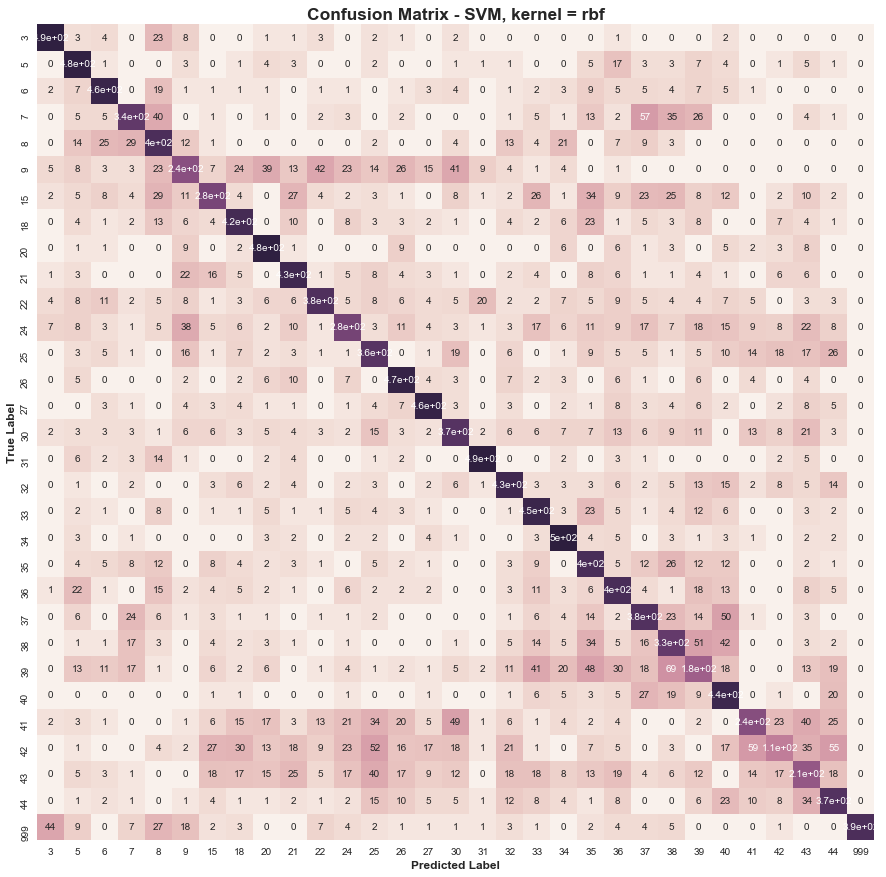

In [123]:
figsize(15, 15)
plot_confusion('Confusion Matrix - SVM, kernel = rbf',y_test, y_SVM_rbf_pred)

#### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
%%time
DTC = DecisionTreeClassifier(max_depth=15,class_weight='balanced')
DTC.fit(X_train, y_train);

y_DTC_pred_train = DTC.predict(X_train)
print('Decision Tree Classifier Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_DTC_pred_train))

Decision Tree Classifier Accuracy Score (Train)= 0.621556579621
CPU times: user 509 ms, sys: 17.7 ms, total: 527 ms
Wall time: 529 ms


In [67]:
%%time
y_DTC_pred = DTC.predict(X_test)
print('Decision Tree Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_DTC_pred))

Decision Tree Classifier Accuracy Score(Test)= 0.571565113501
CPU times: user 13.3 ms, sys: 5.95 ms, total: 19.2 ms
Wall time: 16.6 ms


In [68]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_DTC_pred_train, average='micro')
print('Recall micro-average for DTC (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_DTC_pred, average='micro')
print('Recall micro-average for DTC (Test) =', RecallTest)

Recall micro-average for DTC (Train) = 0.621556579621
Recall micro-average for DTC (Test) = 0.571565113501


In [69]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train,  y_DTC_pred_train, average='micro')
print('Precision micro-average for DTC (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_DTC_pred, average='micro')
print('Precision micro-average for DTC (Test) =', PrecisionTest)

Precision micro-average for DTC (Train) = 0.621556579621
Precision micro-average for DTC (Test) = 0.571565113501


In [70]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train,y_DTC_pred_train, average='micro')
print('F1_score micro-average for DTC (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_DTC_pred, average='micro')
print('F1_score micro-average for DTC (Test) =', F1Test)

F1_score micro-average for DTC (Train) = 0.621556579621
F1_score micro-average for DTC (Test) = 0.571565113501


#### Random Forest Classifier  -  BEST

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
%%time
RFC =  RandomForestClassifier(class_weight='balanced',min_samples_split=40)
RFC.fit(X_train, y_train);

y_RFC_pred_train = RFC.predict(X_train)
print('Random Forest Classifier Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_RFC_pred_train))

Random Forest Classifier Accuracy Score (Train)= 0.784459805428
CPU times: user 862 ms, sys: 71.3 ms, total: 933 ms
Wall time: 933 ms


In [107]:
%%time
y_RFC_pred = RFC.predict(X_test)
print('Random Forest Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_RFC_pred))

Random Forest Classifier Accuracy Score(Test)= 0.711409796894
CPU times: user 92.5 ms, sys: 32.4 ms, total: 125 ms
Wall time: 123 ms


In [108]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_RFC_pred_train, average='micro')
print('Recall micro-average for RFC (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,   y_RFC_pred, average='micro')
print('Recall micro-average for RFC (Test) =', RecallTest)

Recall micro-average for RFC (Train) = 0.784459805428
Recall micro-average for RFC (Test) = 0.711409796894


In [109]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train,  y_RFC_pred_train, average='micro')
print('Precision micro-average for RFC (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_RFC_pred, average='micro')
print('Precision micro-average for RFC (Test) =', PrecisionTest)

Precision micro-average for RFC (Train) = 0.784459805428
Precision micro-average for RFC (Test) = 0.711409796894


In [110]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train,y_RFC_pred_train, average='micro')
print('F1_score micro-average for RFC (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test,y_RFC_pred, average='micro')
print('F1_score micro-average for RFC (Test) =', F1Test)

F1_score micro-average for RFC (Train) = 0.784459805428
F1_score micro-average for RFC (Test) = 0.711409796894


In [111]:
%%time
y_RFC_pred = RFC.predict(X_test)
print('Random Forest Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_RFC_pred))
print(classification_report(y_test, y_RFC_pred))

Random Forest Classifier Accuracy Score(Test)= 0.711409796894
             precision    recall  f1-score   support

          3       0.86      0.96      0.91       540
          5       0.81      0.84      0.82       540
          6       0.82      0.87      0.84       540
          7       0.71      0.59      0.64       540
          8       0.66      0.73      0.69       540
          9       0.75      0.39      0.52       540
         15       0.71      0.58      0.64       540
         18       0.71      0.90      0.80       540
         20       0.80      0.93      0.86       540
         21       0.76      0.88      0.82       540
         22       0.80      0.83      0.82       540
         24       0.65      0.52      0.58       540
         25       0.65      0.65      0.65       540
         26       0.76      0.93      0.83       540
         27       0.81      0.91      0.86       540
         30       0.68      0.74      0.71       540
         31       0.85      0.98    

#### Confusion Matrix- Random Forest

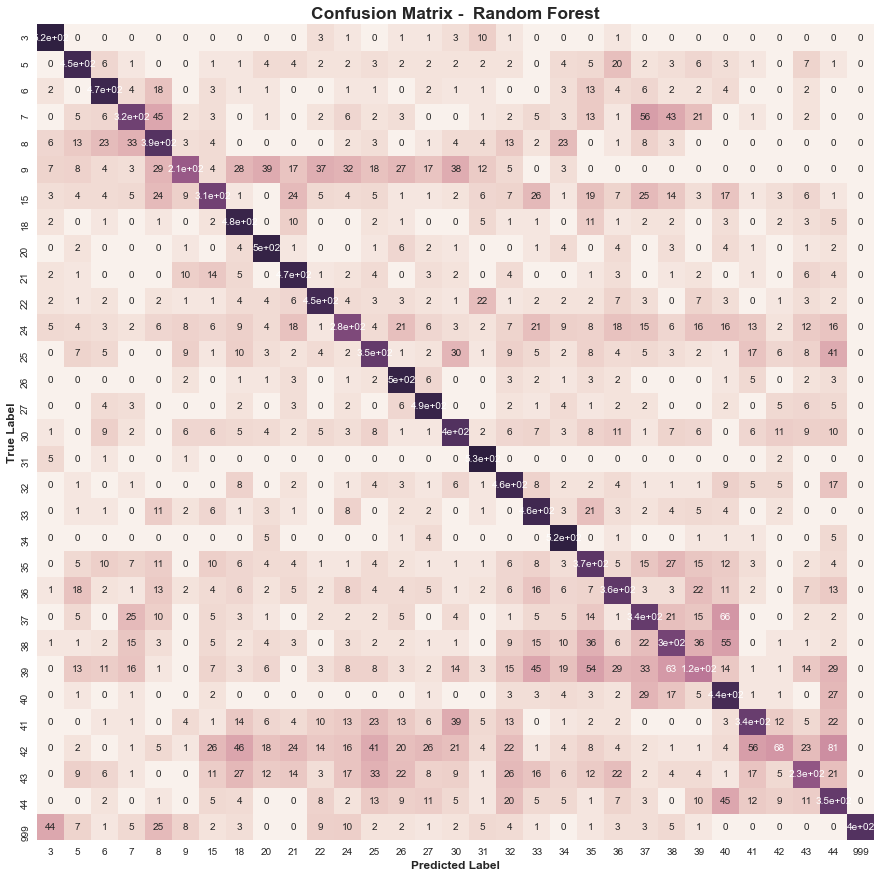

In [112]:
figsize(15, 15)
plot_confusion('Confusion Matrix -  Random Forest',y_test, y_RFC_pred)

#### Combination of KNN RFC and Logistic

In [68]:
len(y_RFC_pred), len(y_knn_pred), len(y_Log_pred)

(28655, 28655, 28655)

In [116]:
y_ens = []
for i in range(len(y_RFC_pred)):
    if y_RFC_pred[i]==y_SVM_rbf_pred[i]:
        y_ens.append(y_RFC_pred[i])
    else:
        y_ens.append(y_knn_pred[i])
print('Combined Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_ens))
print(classification_report(y_test, y_ens))

Combined Classifier Accuracy Score(Test)= 0.638317920084
             precision    recall  f1-score   support

          3       0.79      0.94      0.86      1093
          4       0.14      0.63      0.23       104
          5       0.76      0.61      0.68      1378
          6       0.58      0.84      0.69       383
          7       0.70      0.64      0.67      1726
          8       0.76      0.80      0.78      3648
          9       0.76      0.45      0.57      2839
         12       0.20      0.15      0.17        81
         14       0.00      0.00      0.00         1
         15       0.46      0.44      0.45       293
         18       0.30      0.56      0.39       165
         19       0.23      0.74      0.36       112
         20       0.40      0.79      0.53       191
         21       0.49      0.71      0.58       192
         22       0.47      0.28      0.35       278
         23       0.25      0.69      0.37        42
         24       0.60      0.51      0.5

/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
logregM = LogisticRegression(C=1, penalty='l2', random_state=0, class_weight='balanced')

logregM.fit(X_train_scaled, y_train)